<h2>Introduction</h2>

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this will predict the final price of each home.

Our goal is to have above 90% accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

In [3]:
df  = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2>I - Exploratory Data Analysis</h2>

<h3>Check the correlation of all columns vs the label</h3>
<h5>Columns with the highest correlation with SalePrice</h5>

In [4]:
corr = df.corr()['SalePrice'].sort_values(ascending=False).head(20).to_frame()

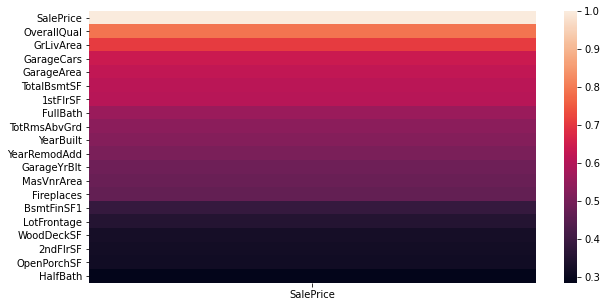

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(corr)

<h4>Plot of OverallQual vs SalePrice</h4>

<Figure size 1080x720 with 0 Axes>

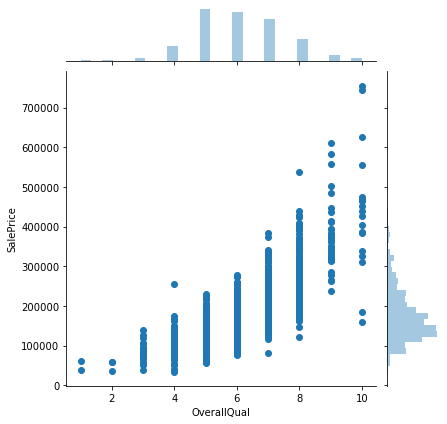

In [6]:
plt.figure(figsize=(15,10))
sns.jointplot(x='OverallQual', y='SalePrice', data=df)

<h4>Plot of GrLivArea vs SalePrice</h4>

<Figure size 1080x720 with 0 Axes>

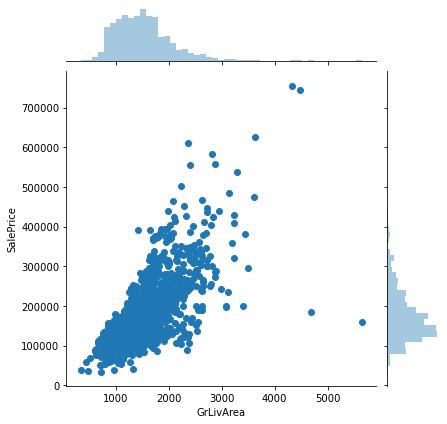

In [7]:
plt.figure(figsize=(15,10))
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

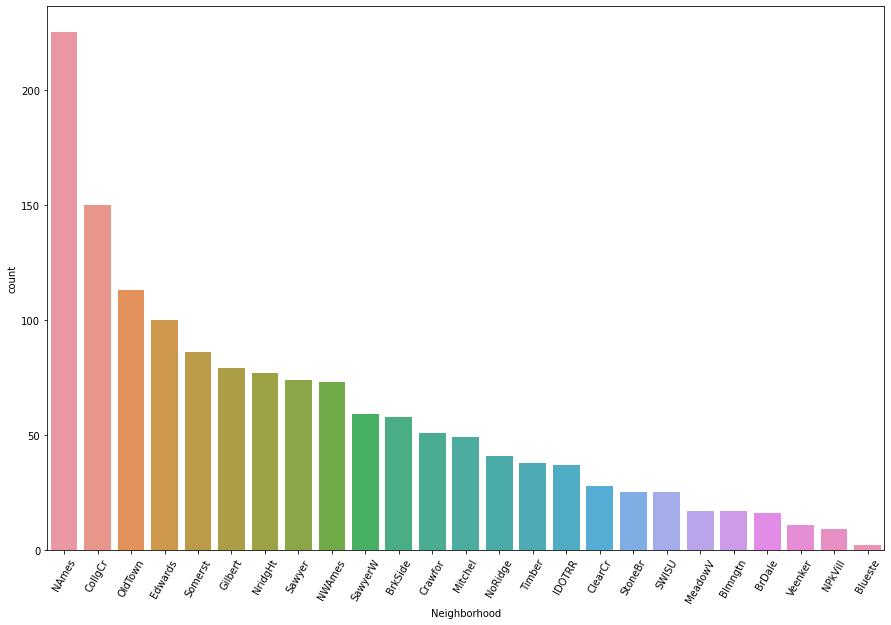

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(x='Neighborhood', data=df, order=df['Neighborhood'].value_counts().index)
plt.xticks(rotation=60)

**Neighborhood VS Saleprice**

([<matplotlib.axis.XTick at 0x7f188b3e9210>,
 [Text(0, 0, 'CollgCr'),
  Text(0, 0, 'Veenker'),
  Text(0, 0, 'Crawfor'),
  Text(0, 0, 'NoRidge'),
  Text(0, 0, 'Mitchel'),
  Text(0, 0, 'Somerst'),
  Text(0, 0, 'NWAmes'),
  Text(0, 0, 'OldTown'),
  Text(0, 0, 'BrkSide'),
  Text(0, 0, 'Sawyer'),
  Text(0, 0, 'NridgHt'),
  Text(0, 0, 'NAmes'),
  Text(0, 0, 'SawyerW'),
  Text(0, 0, 'IDOTRR'),
  Text(0, 0, 'MeadowV'),
  Text(0, 0, 'Edwards'),
  Text(0, 0, 'Timber'),
  Text(0, 0, 'Gilbert'),
  Text(0, 0, 'StoneBr'),
  Text(0, 0, 'ClearCr'),
  Text(0, 0, 'NPkVill'),
  Text(0, 0, 'Blmngtn'),
  Text(0, 0, 'BrDale'),
  Text(0, 0, 'SWISU'),
  Text(0, 0, 'Blueste')])

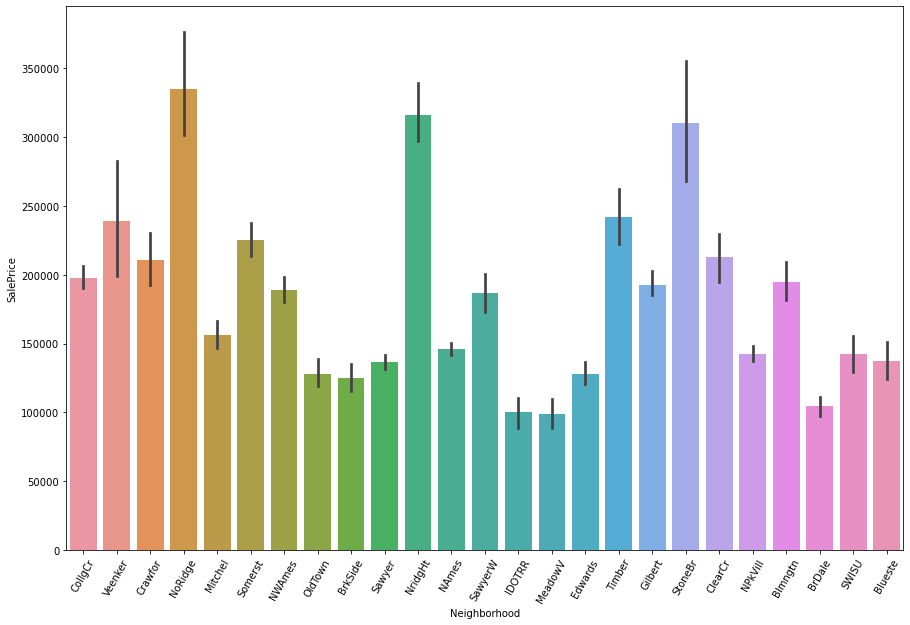

In [9]:
Neighborhood = dict(zip(df['Neighborhood'].unique().tolist(), range(len(df['Neighborhood'].unique().tolist()))))
df.replace({'Neighborhood': Neighborhood}, inplace=True)
plt.figure(figsize=(15,10))
sns.barplot(x='Neighborhood', y='SalePrice', data=df)
plt.xlabel('Neighborhood')
plt.xticks([*range(0, len(Neighborhood))], Neighborhood, rotation=60)

**House Style VS Sale Price**

([<matplotlib.axis.XTick at 0x7f188b083190>,
 [Text(0, 0, '2Story'),
  Text(0, 0, '1Story'),
  Text(0, 0, '1.5Fin'),
  Text(0, 0, '1.5Unf'),
  Text(0, 0, 'SFoyer'),
  Text(0, 0, 'SLvl'),
  Text(0, 0, '2.5Unf'),
  Text(0, 0, '2.5Fin')])

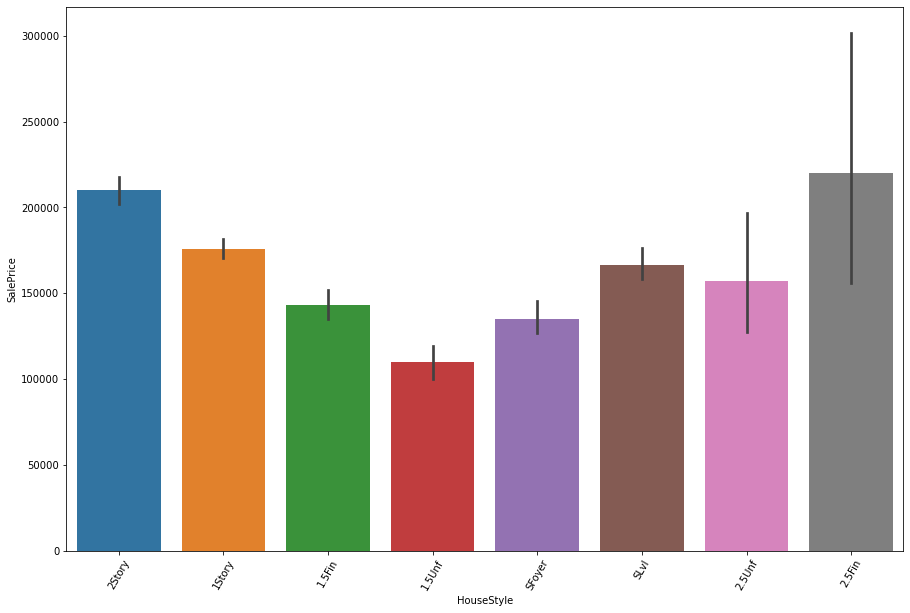

In [10]:
HouseStyle = dict(zip(df['HouseStyle'].unique().tolist(), range(len(df['HouseStyle'].unique().tolist()))))
df.replace({'HouseStyle': HouseStyle}, inplace=True)
plt.figure(figsize=(15,10))
sns.barplot(x='HouseStyle', y='SalePrice', data=df)
plt.xlabel('HouseStyle')
plt.xticks([*range(0, len(HouseStyle))], HouseStyle, rotation=60)

**Basement VS Sale Price**

([<matplotlib.axis.XTick at 0x7f188af9c090>,
 [Text(0, 0, 'GLQ'),
  Text(0, 0, 'ALQ'),
  Text(0, 0, 'Unf'),
  Text(0, 0, 'Rec'),
  Text(0, 0, 'BLQ'),
  Text(0, 0, 'nan'),
  Text(0, 0, 'LwQ')])

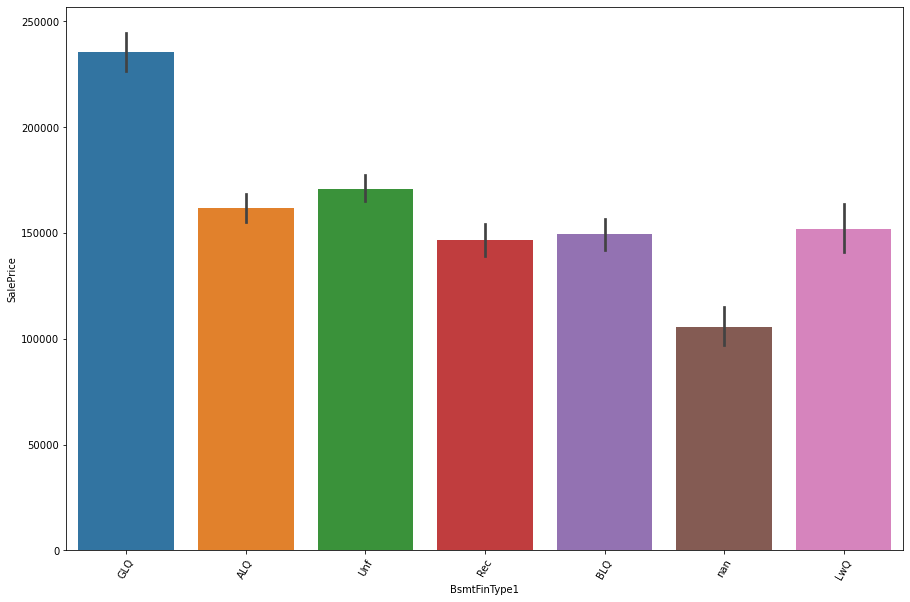

In [11]:
BsmtFinType1 = dict(zip(df['BsmtFinType1'].unique().tolist(), range(len(df['BsmtFinType1'].unique().tolist()))))
df.replace({'BsmtFinType1': BsmtFinType1}, inplace=True)
plt.figure(figsize=(15,10))
sns.barplot(x='BsmtFinType1', y='SalePrice', data=df)
plt.xlabel('BsmtFinType1')
plt.xticks([*range(0, len(BsmtFinType1))], BsmtFinType1, rotation=60)

**Building Type VS Sale Price**

([<matplotlib.axis.XTick at 0x7f188b083410>,
 [Text(0, 0, '1Fam'),
  Text(0, 0, '2fmCon'),
  Text(0, 0, 'Duplex'),
  Text(0, 0, 'TwnhsE'),
  Text(0, 0, 'Twnhs')])

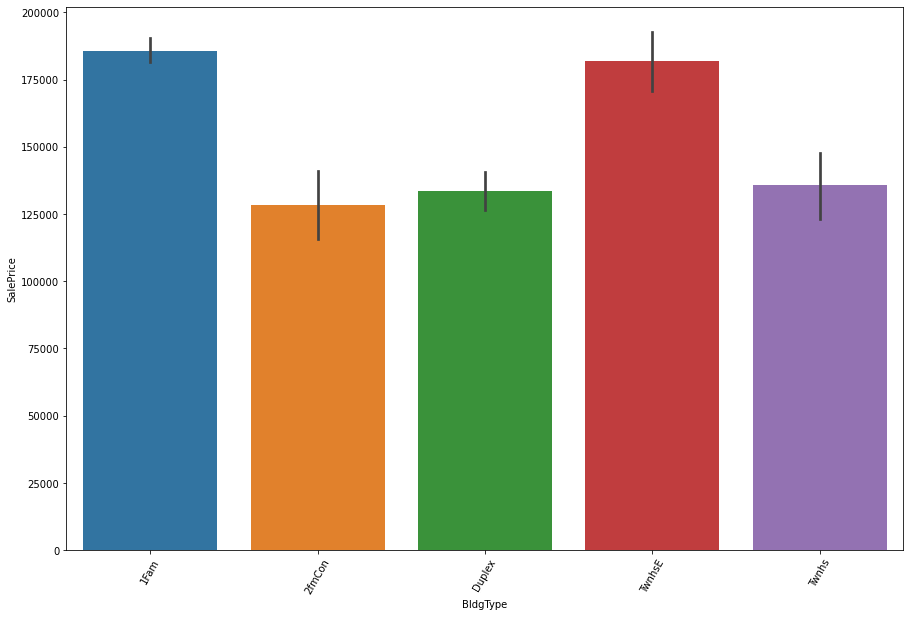

In [12]:
BldgType = dict(zip(df['BldgType'].unique().tolist(), range(len(df['BldgType'].unique().tolist()))))
df.replace({'BldgType': BldgType}, inplace=True)
plt.figure(figsize=(15,10))
sns.barplot(x='BldgType', y='SalePrice', data=df)
plt.xlabel('BldgType')
plt.xticks([*range(0, len(BldgType))], BldgType, rotation=60)

<h2>II - Feature Engineering</h2>

**We need to do something about the NA values**

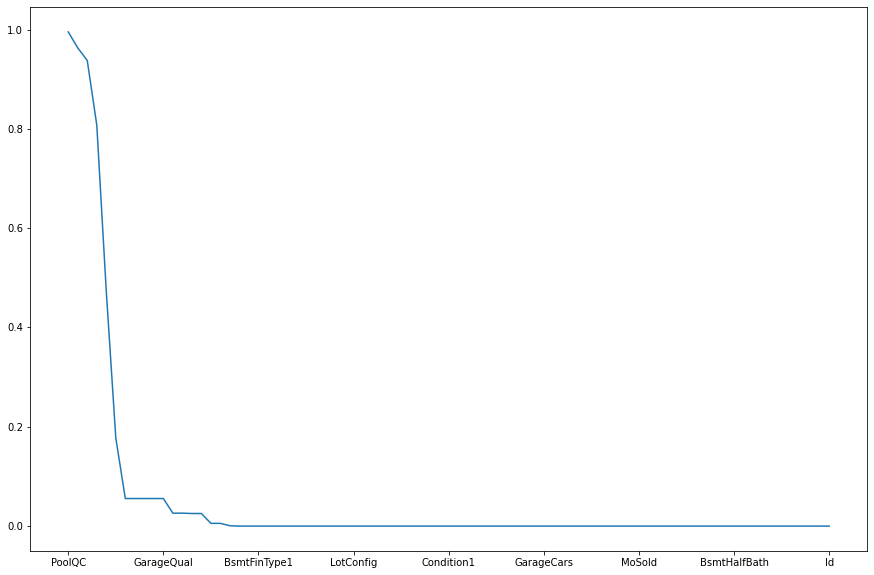

In [13]:
plt.figure(figsize=(15,10))
df.isnull().mean().sort_values(ascending=False).plot()

In [14]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(value='NF')
df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)
df['LotFrontage'] = df['LotFrontage'].fillna(value=df['LotFrontage'].mean())
df['GarageType'] = df['GarageType'].fillna(value='NoGar')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].mean())
df['GarageQual'] = df['GarageQual'].fillna(value='NoGar')
df['GarageFinish'] = df['GarageFinish'].fillna(value='NoGar')
df['GarageCond'] = df['GarageCond'].fillna(value='NoGar')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(value='NoBasement')
df['BsmtExposure'] = df['BsmtExposure'].fillna(value='NoBasement')
df['BsmtQual'] = df['BsmtQual'].fillna(value='NoBasement')
df['BsmtCond'] = df['BsmtCond'].fillna(value='NoBasement')
df['MasVnrType'] = df['MasVnrType'].fillna(value='None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(value=0.0)

Electrical = dict(zip(df['Electrical'].unique().tolist(), range(len(df['Electrical'].unique().tolist()))))
df.replace({'Electrical': Electrical}, inplace=True)
df['Electrical'] = df['Electrical'].fillna(value=0)

In [15]:
df.isnull().mean().sort_values(ascending=False)

SalePrice       0.0
ExterCond       0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
               ... 
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
Id              0.0
Length: 77, dtype: float64

**Convert string values to a number representation for training**

In [16]:
for column in df.columns:
    if(df[column].dtype == 'object'):
        df.replace({column: dict(zip(df[column].unique().tolist(), range(len(df[column].unique().tolist()))))}, inplace=True)


In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,1,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,1,0,0,2,...,272,0,0,0,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,1,0,0,1,...,0,0,0,0,0,12,2008,0,0,250000


**Create more feature**

In [18]:
df['totalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] + df['GarageArea']
df['Bathrooms'] = df['FullBath'] + df['HalfBath'] * 0.5
df['Year average'] = (df['YearRemodAdd'] + df['YearBuilt']) / 2

> **Correlations of the new features**

In [19]:
new_corr = pd.DataFrame({'Feature Name': ['Total Area', 'Bathrooms', 'Year Average'], 
                         'Corr': [df['totalArea'].corr(df['SalePrice']), df['Bathrooms'].corr(df['SalePrice']), df['Year average'].corr(df['SalePrice'])]})
new_corr

,Feature Name,Corr
0,Total Area,0.801018
1,Bathrooms,0.597966
2,Year Average,0.576144


<h2>III - Training</h2>

In [20]:
y = df['SalePrice']
X = df.drop(columns='SalePrice')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
models = {
    'linear regression': LinearRegression(),
    'gradient boosting regressor': GradientBoostingRegressor(n_estimators=2000, max_depth=1),
    'lasso regression': Lasso()
}

In [23]:
score_df = pd.DataFrame({'Model': [], 'Accuracy': []})

for key, value in models.items():
    model = value
    model.fit(X_train,y_train)
    score = model.score(X_test, y_test)
    
    score_df = score_df.append({
        'Model': key,
        'Accuracy': score * 100
    }, ignore_index=True)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104910371685.98303, tolerance: 645004089.8708483
  positive)


In [24]:
score_df

,Model,Accuracy
0,linear regression,69.397914
1,gradient boosting regressor,90.037869
2,lasso regression,69.405221


<h2>IV - Conclusion</h2>

* Gradient Boosting Regressor helps us achieve 90% score accuracy
* Adding total area feature helps!